- Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

- Below is the Cost function in linear regression we use this cost function 

$$cost function=\sum_{i=0}^n \ (y-\vec y)^2$$

- over fitting

- But in Lasso Regression we will change add an other term i.e $$s=\lambda x(slope)^2$$

### So finally it becomes For Ridge Regression 
$$ cost function= \sum_{i=0}^n \ (y-\vec y)^2 + \lambda x(slope)^2$$

###  Lasso Regression 
$$ cost function= \sum_{i=0}^n \ (y-\vec y)^2 + \lambda x |slope|$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    !pip install seaborn

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

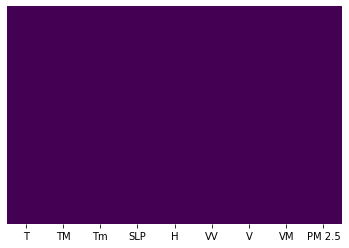

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
df=df.dropna()

In [6]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Ridge Regression

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [9]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [10]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-3308.610935753803


# Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

In [12]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,5,10,20,30,40,50,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/home/saiprasad/anaconda3/envs/AQI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058732.9915231063, tolerance: 444.6515823913645
  model = cd_fast.enet_coordinate_descent(
/home/saiprasad/anaconda3/envs/AQI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1057723.2311752464, tolerance: 461.5429466246394
  model = cd_fast.enet_coordinate_descent(
/home/saiprasad/anaconda3/envs/AQI/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063435.0123427545, tolerance: 451.7191607635284
  model = cd_fast.enet_coordinate_descent(
/home/saiprasad/anaconda3/envs/AQI/lib/python3

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 5,
                                   10, 20, 30, 40, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [13]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3302.83321714684


## Model evaluation

In [17]:
ridge_pred=ridge_regressor.predict(X_test)

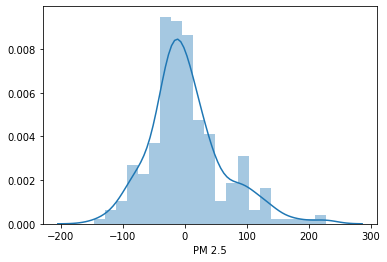

In [19]:
sns.distplot(y_test-ridge_pred)

In [20]:
lasso_pred = lasso_regressor.predict(X_test)

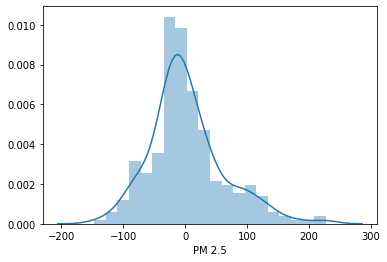

In [21]:
sns.distplot(y_test-lasso_pred)